In [1]:
### Generate grid-based representations from stroke-wise coordinate data

In [1]:
import pandas as pd
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [9]:
def row_wise(df, num_strokes):
    """Iterate over y-coordinates of all strokes. Divide grid into 5 parts
    and assign a number between 1 to 5 based on coordinate
    y-coordinates are all negative; absolute values considered.
    Less negative coordinates are 'higher up' on the grid, so lesser tha absolute value,
    lesser the row-number."""
    all_strokes_rowwise = [] # strings for all strokes
    for num in range(1, num_strokes+1):
        row = 'y' + str(num)
        for y_coord in df[row].dropna():
            if 0 <= abs(y_coord) < 21:
                all_strokes_rowwise.append('1')            
            elif 21 <= abs(y_coord) < 42:
                all_strokes_rowwise.append('2')
            elif 42 <= abs(y_coord) < 63:
                all_strokes_rowwise.append('3')
            elif 63 <= abs(y_coord) < 84:
                all_strokes_rowwise.append('4')
            elif 84 <= abs(y_coord) <= 105:
                all_strokes_rowwise.append('5')
            else:
                print('Error: row-wise out of grid')
    
    return(''.join(all_strokes_rowwise))

# FIND SIMPLER WAY INSTEAD OF IF/ELIF; divide by 15/21/whatever, based on the quotient/remainder?

In [10]:
def column_wise(df, num_strokes):
    """Iterate over x-coordinates of all strokes. Divide grid into 5 parts
    and assign a number between 1 to 5 based on coordinate"""
    all_strokes_colwise = [] # strings for all strokes
    for num in range(1, num_strokes+1):
        col = 'x' + str(num)
        for x_coord in df[col].dropna():
            if 0 <= abs(x_coord) < 21:
                all_strokes_colwise.append('1')            
            elif 21 <= abs(x_coord) < 42:
                all_strokes_colwise.append('2')
            elif 42 <= abs(x_coord) < 63:
                all_strokes_colwise.append('3')
            elif 63 <= abs(x_coord) < 84:
                all_strokes_colwise.append('4')
            elif 84 <= abs(x_coord) <= 105:
                all_strokes_colwise.append('5')
            else:
                print('Error: column-wise out of grid')
                print(x_coord)
    
    return(''.join(all_strokes_colwise))


In [11]:
def is_line(dydx):
    """Calculate the derivative dy/dx
    for each dy/dx, check how far it is from the mean (dydx-mean). If the distance lies within
    a certain range, qualify as a line
    Input:
    dydx - first derivative
    
    Returns True if line, else False"""
    
    meandiff = np.mean(dydx) 
    tolerance = 0.06 # set some tolerance
    return all(abs(dydx - meandiff) < 0.1) # returns True if all values of the array are True, i.e. all the distances < tolerance
    

In [12]:
def primitive_wise(df, num_strokes):
    # calculates first derivative of the curve, writes L if line, else C
    
    all_strokes = [] # strings for all strokes
    
    for num in range(1, num_strokes+1):
        x_coord = df['x'+str(num)].dropna()
        y_coord = df['y'+str(num)].dropna()
        if all(y_coord == 0) or all(x_coord == 0): # horizontal or vertical line
            all_strokes.append('L')
        
        elif is_line(np.diff(y_coord)/np.diff(x_coord)) == True:
            all_strokes.append('L')
        
        else: # not a line
            all_strokes.append('C')
            
    
    return(''.join(all_strokes))

In [13]:
representations = [] # all representations for all objects
for imnumber in range(1, 50):
    for skelnumber in range(1, 11):
        filename = 'C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\strokecoordinates\\' + str(imnumber) + '_' + str(skelnumber) + '.xlsx'
 
        if os.path.isfile(filename):
            df = pd.read_excel(filename, header = None)

            # rename columns
            num_strokes = int(len(df.columns)/2) # number of strokes = half the total number of columns
            col_names = []
            for col_number in range(1, num_strokes+1):
                x = 'x' + str(col_number)
                y = 'y' + str(col_number)
                col_names.append(x)
                col_names.append(y)

            df.columns = col_names

            # generate representations
            row_rep = row_wise(df, num_strokes)
            col_rep = column_wise(df, num_strokes)
            prim_rep = primitive_wise(df, num_strokes)
#             combined_rep = row_rep + col_rep + prim_rep

            if len(row_rep) != len(col_rep) or len(prim_rep) != num_strokes:
                print('Error: sizes don\'t match')
                print(filename)
            else:
                pass

            key = str(imnumber) + '_' + str(skelnumber)
#             all_reps = pd.Series([row_rep, col_rep, prim_rep, combined_rep], name = key) # all representations for one object
            all_reps = pd.Series([row_rep, col_rep, prim_rep], name = key)
            representations.append(all_reps)     
        
        else:
            pass

C:\Users\aasth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Users\aasth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\aasth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\aasth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
C:\Users\aasth\Anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [14]:
# write to excel workbook
# _____ | obj1 | obj2 | ....
# rowrep| ...  | ...  |
# colrep| ...  | ...  |
#primrep| ...  | ...  |
#combined| ... | ...  |

repdf = pd.concat(representations, axis = 1)
repdf.to_excel('grid_rep.xlsx')

# edit distance

In [4]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

## Do not run the following cell if updated grid_rep.xlsx was not saved (in the cell before edit distance)

In [2]:
repdf = pd.read_excel('C:\\Users\\aasth\\Documents\\Thesis\\Data\\grid_rep.xlsx')
del repdf['Unnamed: 0'] # remove row headers
repdf

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,...,44_1,44_2,44_3,44_4,44_5,44_6,44_7,44_8,44_9,44_10
0,1111111112222222222222333333333333333344444444...,1111111112222222222222333333333333333444444444...,1111111112222222222222233333333333333344444444...,5554444444444444444444444444444444444444444444...,2223333333333333333334444444444444444444444433...,3333333333333333333333333333333333333222222222...,3333333333333333334444444444444445555553333333...,2222223333333333333344444444444444455555555333...,4444444444444443333333333333333322222222222222...,2222222222223333333333333333333444444444444433...,...,5555555555222222222222222222222223333333333333...,2222222222222222222222233333333333333334444444...,5555555555555555555555555555552222222222222222...,2222222222222222222222233333333333333334444444...,1111111222222222222222333333222223333333333333...,2222111111111111111122222222222222222223333333...,3332222222222222333333333333333333334444444444...,2222222222222222222222222222333333332222222333...,1111111112222222222222333333333333333333333333...,3333222222222223333333333332222222222555555444...
1,3333333333333333333333333333333333333333333444...,3333333333333333333333333333333333333333344444...,3333333333333333333333333333333333333333333444...,4444444444444443333333333333333222222222222222...,3333333333333333333333332222222222222111111133...,1112222222222222223333333333333344444444444444...,3333333333333333333333333333333333333333333444...,4444444444444433333333344444444444444444444333...,5555544444444444444443333333333333333333333333...,1111111222222222222222333333333333333333333333...,...,3333333333111111111222222222222222222222222222...,1111111112222222222222222222222222222333333333...,2222222233222222222233333333331111111112222222...,1111111112222222222222222222222222222333333333...,3333333333333333333333333344444443333333333333...,3333333333334433333333333333333333333333333344...,1122222211112222222222222222222222222222222221...,2222222222222222211122222222222222222222222222...,3333333333333333333333344444444444444555555554...,1111111111111222222222222221111111111111111111...
2,C,CC,C,CC,CC,C,CC,CC,C,CC,...,CCCCCC,CCCCLCC,CCCCCCC,CCCCC,CCCC,CCC,CCCC,CCCCC,CCCC,CCCC


In [5]:
total_images = len(repdf.columns)
allrowdists = np.zeros((total_images, total_images))# n x n array (n: total number of images)

for num1 in range(0, total_images):
    rowid_1 = repdf.iloc[0, num1]
    colid_1 = repdf.iloc[1, num1]
    primid_1 = repdf.iloc[2, num1]
#     combid_1 = repdf.iloc[3, num1]
    rowdists = [] # all distances from num1-th image
    
    for num2 in range(0, total_images):
        rowid_2 = repdf.iloc[0, num2]
        colid_2 = repdf.iloc[1, num2]
        primid_2 = repdf.iloc[2, num2]
#         combid_2 = repdf.iloc[3, num2]
        rowdist = levenshteinDistance(rowid_1, rowid_2)
        coldist = levenshteinDistance(colid_1, colid_2)
        primdist = levenshteinDistance(primid_1, primid_2)
#         combdist = levenshteinDistance(combid_1, combid_2)
#         avdist = np.mean(rowdist+coldist+primdist+combdist)
        avdist = np.mean(rowdist+coldist+primdist)
        rowdists.append(avdist)
        
    
    allrowdists[num1] = rowdists

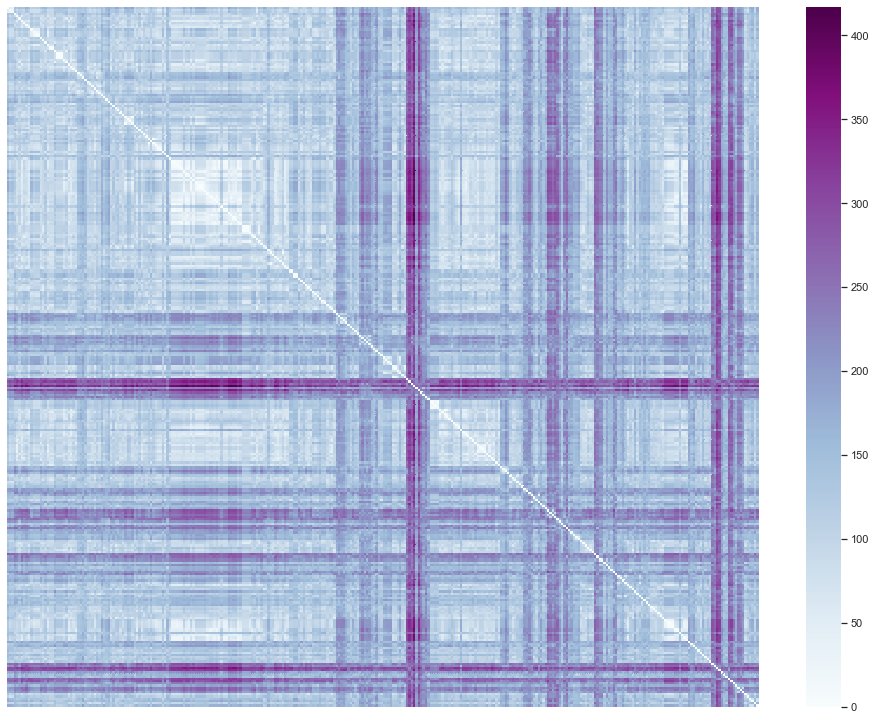

In [7]:
sns.set(rc={'figure.figsize':(15,12)})
# add x and y labels
heatmap = sns.heatmap(allrowdists, cmap = 'BuPu', yticklabels=False, xticklabels = False)
plt.show()
# fig = heatmap.get_figure()
# fig.savefig('grid_dist.png')

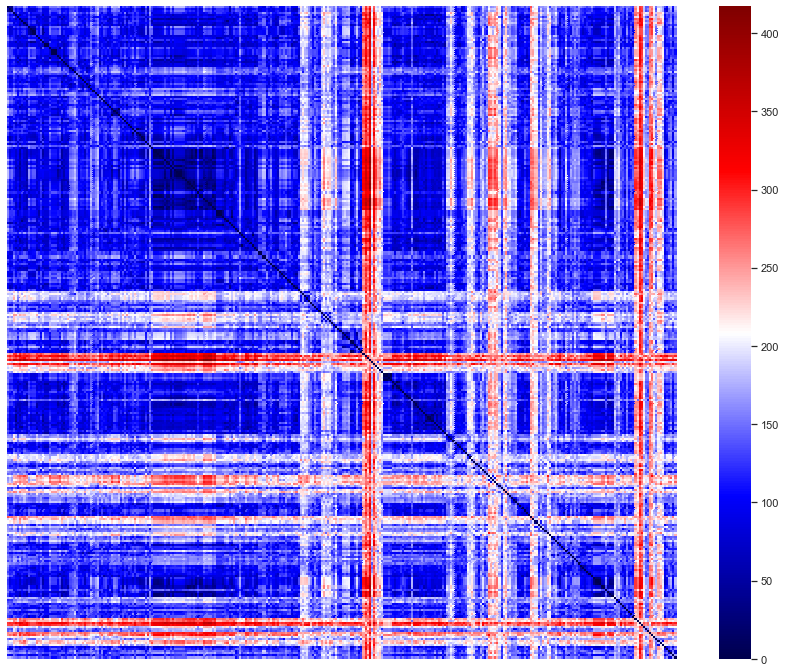

In [11]:
sns.set(rc={'figure.figsize':(15,12)})
# add x and y labels
heatmap = sns.heatmap(allrowdists, cmap = 'seismic', yticklabels=False, xticklabels = False)
plt.show()
fig = heatmap.get_figure()
fig.savefig('grid_dist.png')

In [7]:
# Check if the 9-nearest neighbours are from the same category or not
# for row i of the array, find the 9 smallest distances. Find locations of the smallest distances
# check if locations are within the same category

In [39]:
def NearestNeighbours(indices, lower, upper):
    samecat = 0
    diffcat = 0
    for num in indices:
        if num >= lowerbound and num < upperbound:
            samecat += 1
        else:
            diffcat += 1
    return samecat, diffcat

def PlotNeighbors(samecat, diffcat):
    x = [1, 2]
    plt.bar(x, [samecat, diffcat])
    plt.xticks(x, ('Same category', 'Different category'))
    plt.show()
#     plt.savefig(plotfilename)
#     print(samecat, diffcat)
    plt.clf()

In [ ]:
# allsame = []
# alldiff = []
sns.set(rc={'figure.figsize':(7,5)})
lowerbound = 0
upperbound = 10

while upperbound <= len(allrowdists):
    plotfilename = 'cat' + str(lowerbound) + '.png'
    for rownumber in range(lowerbound, upperbound):
        A = allrowdists[rownumber]
        indices = np.argpartition(A, 10)[:10] # find indices of 10 smallest distances (argpartition places 10 smallest indices
        # first but returns a list of all indices, so it has to be sliced using [:10])
        indices = indices[(indices != 0)] # remove distance corresponding to the object itself
        SameCategory, DiffCategory = NearestNeighbours(indices, lowerbound, upperbound)

        if rownumber == upperbound - 1: # at the last iteration of the for loop, change upper and lower bounds
            lowerbound = upperbound
            upperbound += 10

    PlotNeighbors(SameCategory, DiffCategory)
#     allsame.append(samecat)
#     alldiff.append(diffcat)



In [15]:
print(np.mean(allsame))
print(np.mean(alldiff))

17.53125
72.46875


Text(0, 0.5, 'Number of objects')

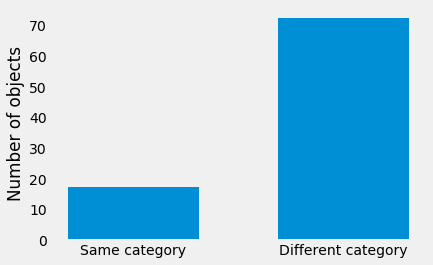

In [6]:
plt.grid(False)
plt.bar([0.4, 0.8], [17.5, 72.5], width = 0.25)
plt.xticks([0.4, 0.8], ('Same category', 'Different category'))
plt.ylabel('Number of objects')